S&P500 Stock Correlation 

In [1]:

import bs4 as bs
import pickle
import requests

import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

import os
import yfinance as yf
import pandas as pd
import datetime as dt

style.use('ggplot')

In [2]:

def save_sp500_tickers():

    response = requests.get('https://en.wikipedia.org/wiki/List_of_S&P_500_companies')
    soup = bs.BeautifulSoup(response.text, features="lxml")
    table = soup.find('table' , {'class': 'wikitable sortable'})

    tickers = []

    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        tickers.append(ticker.strip())

    with open("sp500tickers.pickle", "wb") as f:
        pickle.dump(tickers, f)

    #print(tickers)
    return tickers

#save_sp500_tickers()

['MMM',
 'AOS',
 'ABT',
 'ABBV',
 'ACN',
 'ATVI',
 'ADM',
 'ADBE',
 'ADP',
 'AAP',
 'AES',
 'AFL',
 'A',
 'APD',
 'AKAM',
 'ALK',
 'ALB',
 'ARE',
 'ALGN',
 'ALLE',
 'LNT',
 'ALL',
 'GOOGL',
 'GOOG',
 'MO',
 'AMZN',
 'AMCR',
 'AMD',
 'AEE',
 'AAL',
 'AEP',
 'AXP',
 'AIG',
 'AMT',
 'AWK',
 'AMP',
 'ABC',
 'AME',
 'AMGN',
 'APH',
 'ADI',
 'ANSS',
 'AON',
 'APA',
 'AAPL',
 'AMAT',
 'APTV',
 'ACGL',
 'ANET',
 'AJG',
 'AIZ',
 'T',
 'ATO',
 'ADSK',
 'AZO',
 'AVB',
 'AVY',
 'BKR',
 'BALL',
 'BAC',
 'BBWI',
 'BAX',
 'BDX',
 'WRB',
 'BRK.B',
 'BBY',
 'BIO',
 'TECH',
 'BIIB',
 'BLK',
 'BK',
 'BA',
 'BKNG',
 'BWA',
 'BXP',
 'BSX',
 'BMY',
 'AVGO',
 'BR',
 'BRO',
 'BF.B',
 'CHRW',
 'CDNS',
 'CZR',
 'CPT',
 'CPB',
 'COF',
 'CAH',
 'KMX',
 'CCL',
 'CARR',
 'CTLT',
 'CAT',
 'CBOE',
 'CBRE',
 'CDW',
 'CE',
 'CNC',
 'CNP',
 'CDAY',
 'CF',
 'CRL',
 'SCHW',
 'CHTR',
 'CVX',
 'CMG',
 'CB',
 'CHD',
 'CI',
 'CINF',
 'CTAS',
 'CSCO',
 'C',
 'CFG',
 'CLX',
 'CME',
 'CMS',
 'KO',
 'CTSH',
 'CL',
 'CMCSA',
 'CMA

In [22]:


def get_data_from_yahoo(reload_sp500=False):

    if reload_sp500:
        tickers = save_sp500_tickers()
    else:
        with open("sp500tickers.pickle","rb") as f:
            tickers = pickle.load(f)
    if not os.path.exists('stock_dfs'):
        os.makedirs('stock_dfs')

    start = dt.datetime(2010,1,1)
    end = dt.datetime(2016,12,31)

    for ticker in tickers:
        print(ticker)
        ticker = ticker.strip()

        if not os.path.exists(f'stock_dfs/{ticker}.csv'):
            df = yf.download(ticker, start, end)
            df.to_csv(f'stock_dfs/{ticker}.csv')
        else:
            print('Already have {}'.format(ticker))
            

#get_data_from_yahoo()

In [30]:

def compile_data():
    
    with open("sp500tickers.pickle", "rb") as f:
        tickers = pickle.load(f)

    main_df = pd.DataFrame()

    for count, ticker in enumerate(tickers):
        ticker = ticker.strip()
        df = pd.read_csv(f'stock_dfs/{ticker}.csv')

        df.set_index('Date', inplace=True)
        df.rename(columns = {'Adj Close': ticker}, inplace=True)
        df.drop(labels=['Open','High','Low','Close','Volume'], axis=1, inplace=True)

        if main_df.empty:
            main_df = df
        else:
            main_df = main_df.join(df, how= 'outer')

        if count % 10 == 0 :
            print(count)

    main_df.to_csv('sp500_joined_closes.csv')
    pd.set_option('display.max_columns', None)
    print(main_df.sample(5))

#compile_data()

           MMM       AOS       ABT      ABBV       ACN      ATVI       ADM  \
MMM   1.000000  0.967243  0.919624  0.917590  0.949935  0.907650  0.890339   
AOS   0.967243  1.000000  0.875103  0.815726  0.975420  0.958479  0.798256   
ABT   0.919624  0.875103  1.000000  0.870608  0.890861  0.772806  0.876508   
ABBV  0.917590  0.815726  0.870608  1.000000  0.783880  0.740370  0.768558   
ACN   0.949935  0.975420  0.890861  0.783880  1.000000  0.933058  0.773766   

          ADBE       ADP       AAP       AES       AFL         A       APD  \
MMM   0.974936  0.985734  0.946706  0.416417  0.924229  0.932289  0.984101   
AOS   0.977845  0.967805  0.917669  0.296260  0.918118  0.891374  0.944259   
ABT   0.877597  0.934643  0.924884  0.440238  0.815936  0.849022  0.912949   
ABBV  0.868343  0.904653  0.896813  0.056811  0.725472  0.806842  0.928913   
ACN   0.954236  0.970829  0.921371  0.288269  0.876654  0.892569  0.930936   

          AKAM       ALK       ALB       ARE      ALGN      AL

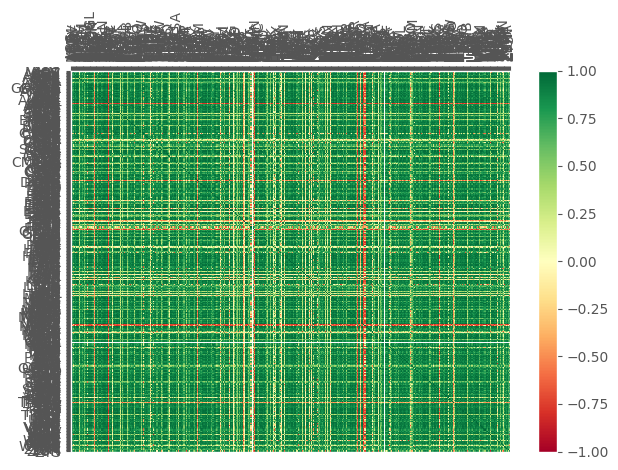

In [28]:
def visualize_data():
    
    df = pd.read_csv('sp500_joined_closes.csv')

    df_corr = df.corr(numeric_only=True)
    pd.set_option('display.max_columns', None)
    print(df_corr.head())

    data = df_corr.values
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)

    heatmap = ax.pcolor(data, cmap=plt.cm.RdYlGn)
    fig.colorbar(heatmap)
    ax.set_xticks(np.arange(data.shape[0]) + 0.5 , minor=False)
    ax.set_yticks(np.arange(data.shape[1]) + 0.5 , minor=False)
    ax.invert_yaxis()
    ax.xaxis.tick_top()

    column_labels = df_corr.columns
    row_labels = df_corr.index

    ax.set_xticklabels(column_labels)
    ax.set_yticklabels(row_labels)
    plt.xticks(rotation=90)
    heatmap.set_clim(-1,1)
    plt.tight_layout()
    plt.show()


    
visualize_data() 